## My First Kaggle Competition


In [0]:
#Install kaggle library and create kaggle directory to store data
#!pip install -U -q kaggle
!mkdir -p ~/.kaggle
#!mkdir  /content/Image_augmentation

In [0]:
#Import json file with user and key from kaggle
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"asosacosta","key":"a7c4c5023d7cf60bb199eb8c00dd027e"}'}

In [0]:
#Copy json file to the haggle directory created above
!cp kaggle.json ~/.kaggle/

In [0]:
#set the path to content folder
!kaggle config set -n path -v{/content} 

- path is now set to: {/content}


In [0]:
#Download data from specif competition
!kaggle competitions download -c plant-seedlings-classification -p /content

  0% 0.00/5.13k [00:00<?, ?B/s]
100% 5.13k/5.13k [00:00<00:00, 2.04MB/s]
 90% 77.0M/86.0M [00:00<00:00, 76.5MB/s]
100% 86.0M/86.0M [00:00<00:00, 104MB/s] 
 99% 1.59G/1.60G [00:16<00:00, 109MB/s]
100% 1.60G/1.60G [00:16<00:00, 103MB/s]


In [29]:
#Unzip the data
!unzip \*.zip

Archive:  sample_submission.csv.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: sample_submission.csv   

Archive:  train.zip
  inflating: train/Fat Hen/5bdfa3a44.png  
  inflating: train/Fat Hen/a86b9c0cd.png  
  inflating: train/Fat Hen/f3f6559bf.png  
  inflating: train/Fat Hen/946b48f62.png  
  inflating: train/Fat Hen/4d7fd4020.png  
  inflating: train/Fat Hen/2509e5bc5.png  
  inflating: train/Fat Hen/e2462573b.png  
  inflating: train/Fat Hen/7e98e4aa6.png  
  inflating: train/Fat Hen/075cb6666.png  
  inflating: train/Fat Hen/b43d0a350.png  
  inflating: train/Fat Hen/afac20b21.png  
  inflating: train/Fat Hen/4d2efbb45.png  
  inflating: train/Fat Hen/f0923dcd6.png  
  inflating: train/Fat Hen/180f41d53.png  
  inflating: train/Fat Hen/bfdeafadd.png  
  inflating: train/Fat Hen/ac6625b0f.png  
  inflating: train/Fat Hen/ba5c8f87f.png  
  inflating: train/Fat Hen/e7d278e0e.png  
  inflating: train/Fat Hen/efaab2370.png  
  inflating: trai

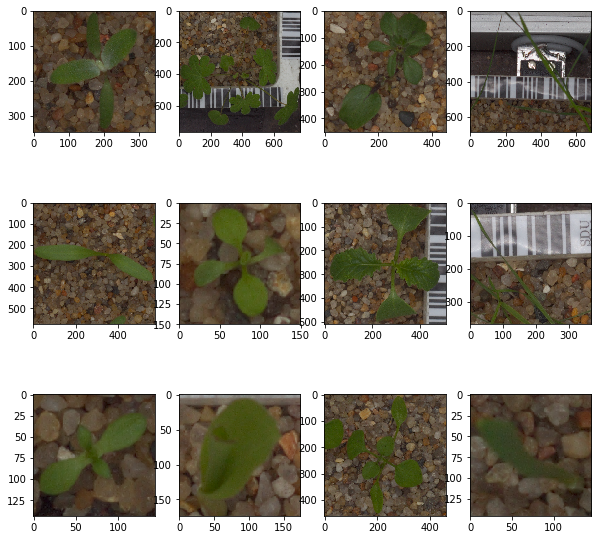

In [0]:
#Import the data
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img1 = mpimg.imread('train/Fat Hen/a86b9c0cd.png')
img2 = mpimg.imread('train/Small-flowered Cranesbill/7adff29ac.png')
img3 = mpimg.imread('train/Cleavers/8a112bfb4.png')
img4 = mpimg.imread('train/Black-grass/840a7ed59.png')
img5 = mpimg.imread('train/Sugar beet/86a304fad.png')
img6 = mpimg.imread('train/Shepherds Purse/b54f52362.png')
img7 = mpimg.imread('train/Charlock/82b303659.png')
img8 = mpimg.imread('train/Loose Silky-bent/bd7ea42d4.png')
img9 = mpimg.imread('train/Scentless Mayweed/ba28e9c09.png')
img10 = mpimg.imread('train/Maize/0086c28b2.png')
img11 = mpimg.imread('train/Common Chickweed/983aed879.png')
img12 = mpimg.imread('train/Common wheat/b8525b55d.png')

fig = plt.figure(figsize=(10, 10))
plt.rcParams["axes.grid"] = False
sub = fig.add_subplot(3, 4, 1)
sub.imshow(img1)
sub = fig.add_subplot(3, 4, 2)
sub.imshow(img2)
sub = fig.add_subplot(3, 4, 3)
sub.imshow(img3)
sub = fig.add_subplot(3, 4, 4)
sub.imshow(img4)
sub = fig.add_subplot(3, 4, 5)
sub.imshow(img5)
sub = fig.add_subplot(3, 4, 6)
sub.imshow(img6)
sub = fig.add_subplot(3, 4, 7)
sub.imshow(img7)
sub = fig.add_subplot(3, 4, 8)
sub.imshow(img8)
sub = fig.add_subplot(3, 4, 9)
sub.imshow(img9)
sub = fig.add_subplot(3, 4, 10)
sub.imshow(img10)
sub = fig.add_subplot(3, 4, 11)
sub.imshow(img11)
sub = fig.add_subplot(3, 4, 12)
sub.imshow(img12)



In [0]:
print(img1.shape)
print(img2.shape)
print(img3.shape) 
print(img4.shape)
print(img5.shape)
print(img6.shape)
print(img7.shape) 
print(img8.shape)
print(img9.shape)
print(img10.shape)
print(img11.shape) 
print(img12.shape)

(346, 346, 3)
(767, 767, 3)
(451, 451, 3)
(685, 685, 3)
(574, 574, 3)
(150, 150, 3)
(509, 509, 3)
(368, 368, 3)
(144, 144, 3)
(174, 174, 3)
(460, 460, 3)
(146, 146, 3)


In [30]:
import os
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
b_size = 32

train_data_augm = ImageDataGenerator(
        rescale          = 1./255,   #every pixel value is multiplied by rescale number
        shear_range      = 0.2,      #random linear transformation to the image
        zoom_range       = 0.2,      #random zooming inside the image
        rotation_range   = 40,       #random rotations between 0 and 40 degrees
        horizontal_flip  = True,     #flip some (randomly) images horizontally
        validation_split = 0.2       #ratio of the validation and traning samples
      
)      

train_generator = train_data_augm.flow_from_directory(
        'train',
        target_size = (64, 64),
        color_mode  = "rgb",
        batch_size  = b_size,
        class_mode  = 'categorical',
        shuffle     = True,        # Shuffling the order in which examples are fed to the classifier is helpful so that batches between epochs do not look alike. Doing so will eventually make our model more robust.
#         seed        = 32,
        subset      = 'training'
        #save_to_dir = '/content/Image_augmentation/'
)


validation_generator = train_data_augm.flow_from_directory(
        'train',
        target_size = (64, 64),
        color_mode  = "rgb",
        batch_size  = b_size,
        class_mode  = 'categorical',
        subset      = 'validation',
        shuffle     = True
       # seed        = 32
  )


Found 3803 images belonging to 12 classes.
Found 947 images belonging to 12 classes.


#Dispaly augmented images

In [0]:
!ls /content/train

 Black-grass	    'Common wheat'	'Scentless Mayweed'
 Charlock	    'Fat Hen'		'Shepherds Purse'
 Cleavers	    'Loose Silky-bent'	'Small-flowered Cranesbill'
'Common Chickweed'   Maize		'Sugar beet'


Fat Hen


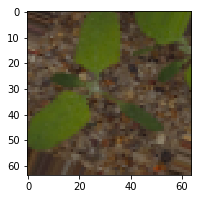

In [0]:

class_names = ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 
    'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed',
               'Shepherds Purse','Small-flowered Cranesbill','Sugar beet']

train_images,train_labels = train_generator.next()
fig2 = plt.figure(figsize=(10, 10))

train_labels_int=train_labels.astype(int).tolist()

sub = fig2.add_subplot(1, 3, 1)
sub.imshow(train_images[1])
print(class_names[train_labels_int[1].index(1)])

In [0]:
print(train_generator.filenames)

['Black-grass/34a672a63.png', 'Black-grass/355cad34c.png', 'Black-grass/37d85d833.png', 'Black-grass/39e9bf4c7.png', 'Black-grass/3a8c485bc.png', 'Black-grass/3b7266ac3.png', 'Black-grass/3b7d1fe82.png', 'Black-grass/3dc08a0f7.png', 'Black-grass/3de7650a2.png', 'Black-grass/3e9ef1999.png', 'Black-grass/3f268bcf8.png', 'Black-grass/3fb361e79.png', 'Black-grass/3ff68fa8a.png', 'Black-grass/40bf7be90.png', 'Black-grass/418808d19.png', 'Black-grass/42336b187.png', 'Black-grass/429a48df1.png', 'Black-grass/42af989bc.png', 'Black-grass/448a59eac.png', 'Black-grass/455546801.png', 'Black-grass/461feacba.png', 'Black-grass/470608aba.png', 'Black-grass/48141d6a7.png', 'Black-grass/495cebacf.png', 'Black-grass/498269666.png', 'Black-grass/4a3b96198.png', 'Black-grass/4a7e7eba8.png', 'Black-grass/4cd2a07dd.png', 'Black-grass/4cf922aea.png', 'Black-grass/4e1cb1e27.png', 'Black-grass/4f0dcbcc3.png', 'Black-grass/4f48eb987.png', 'Black-grass/5212d8564.png', 'Black-grass/5296a06e6.png', 'Black-grass/

#Define neural network architecture

In [31]:
from keras import models
from keras import layers


# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) #output size: 30x30x32 (Her 32 different filters are considered)
# model.add(layers.MaxPooling2D((2, 2)))                                           #output size: 15x15x32
# model.add(layers.Conv2D(32, (3, 3), activation='relu'))                          #output size: 13x13x32
# model.add(layers.MaxPooling2D((2, 2)))                                           #output size: 6x6x32
# model.add(layers.Conv2D(32, (3, 3), activation='relu'))                          #output size: 4x4x32
# model.add(layers.Flatten())                                                      #convert matrix to unidemensional vector
# model.add(layers.Dense(64, activation='relu'))                                   #Add hidden layer                            
# model.add(layers.Dropout(0.05))                                                  #Drop out 5% of neurons randomly
# model.add(layers.Dense(32, activation='relu'))                                   #Add hidden layer
# model.add(layers.Dense(12, activation='softmax'))                                #output layer (Notice that must have 12 neurons, one per each possibble type of plant)
# model.summary()



model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(64,64,3)))
model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D())
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D())
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(128, kernel_size=(2,2), activation='relu'))
model.add(layers.Conv2D(128, kernel_size=(2,2), activation='relu'))
model.add(layers.Conv2D(128, kernel_size=(2,2), activation='relu'))
model.add(layers.MaxPool2D())
model.add(layers.Dropout(0.3))


model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(12, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 60, 60, 32)        9248      
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 58, 58, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 29, 29, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 29, 29, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 27, 27, 64)        18496     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 25, 25, 64)        36928     
__________

# Define Hyperparameters and train de model


In [32]:
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint
from keras import optimizers

checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", 
                               monitor = 'val_acc',
                               verbose=1, 
                               save_best_only=True)

# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
#                              patience=5, min_lr=0.001)

model.compile(optimizer =optimizers.Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
H = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // b_size+1, 
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // b_size+1,
    epochs = 57,
    callbacks=[checkpointer]) #Save best epoch to then plot intermediate layers

Epoch 1/57
119/119 [==============================] - 163s 1s/step - loss: 2.4333 - acc: 0.1355 - val_loss: 2.4285 - val_acc: 0.1288

Epoch 00001: val_acc improved from -inf to 0.12883, saving model to best_weights.hdf5
Epoch 2/57
119/119 [==============================] - 158s 1s/step - loss: 2.4019 - acc: 0.1323 - val_loss: 2.3258 - val_acc: 0.1848

Epoch 00002: val_acc improved from 0.12883 to 0.18479, saving model to best_weights.hdf5
Epoch 3/57
119/119 [==============================] - 158s 1s/step - loss: 2.0693 - acc: 0.2986 - val_loss: 1.7651 - val_acc: 0.3928

Epoch 00003: val_acc improved from 0.18479 to 0.39282, saving model to best_weights.hdf5
Epoch 4/57
119/119 [==============================] - 158s 1s/step - loss: 1.7582 - acc: 0.3832 - val_loss: 1.6007 - val_acc: 0.4382

Epoch 00004: val_acc improved from 0.39282 to 0.43823, saving model to best_weights.hdf5
Epoch 5/57
119/119 [==============================] - 158s 1s/step - loss: 1.6294 - acc: 0.4276 - val_loss: 1.5

# Save model in Google Drive

In [0]:
# model.load_weights('best_weights.hdf5') #Save best epoch data
# model.save('plants_cnn.h5')
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!ls /content/gdrive/'My Drive'

In [0]:
import torch
model_save_name = 'Plantclassifier.pt'
path = F"/content/gdrive/My Drive/{model_save_name}" 
torch.save(model, path)

# Loss and Accuarcy plots

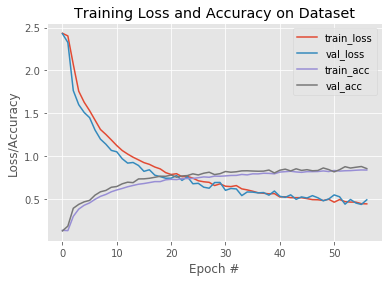

In [35]:
import numpy as np
from keras.callbacks import History
N = 57
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")
# plt.savefig("plot.png")


# Confusion matrix

In [37]:
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

validation_generator.reset() #This is very important to keep the order of output images but doesn´t work. Most probably because shuffle is set to TRUE


Y_pred = model.predict_generator(validation_generator, steps = validation_generator.samples//b_size+1)
y_pred = np.argmax(Y_pred, axis=1) #predicted class indices

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in y_pred]

print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
class_names = ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 
    'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed',
               'Shepherds Purse','Small-flowered Cranesbill','Sugar beet']
print(classification_report(validation_generator.classes, y_pred, target_names = class_names))

Confusion Matrix
[[ 1  7  2  5  0  4  7  2  8  3  9  4]
 [ 5  5  5 14  2 11  9  5 11  2  7  2]
 [ 3  9  2  8  4  9  3  4  2  2  6  5]
 [ 5  9  6 16  9 10 18  2 17  6 11 13]
 [ 7  3  6  3  2  6  4  2  1  2  6  2]
 [ 3  5  2 13  5  6 15  3 21  6  9  7]
 [ 6  6  7 12  5 17 19  9 19  7  8 15]
 [ 0  2  2  3  5  4  5  3  9  0  7  4]
 [ 1 13  4  7  6 10 16  6 15  4 12  9]
 [ 5  3  0  7  0  4  4  4 10  1  4  4]
 [ 3 11  6 16  8  6 12  5  9  5 12  6]
 [ 4 10  5  9  3  7 13  2  7  2 11  4]]
Classification Report
                           precision    recall  f1-score   support

              Black-grass       0.02      0.02      0.02        52
                 Charlock       0.06      0.06      0.06        78
                 Cleavers       0.04      0.04      0.04        57
         Common Chickweed       0.14      0.13      0.14       122
             Common wheat       0.04      0.05      0.04        44
                  Fat Hen       0.06      0.06      0.06        95
         Loose Silky-b

In [38]:
#above example of confusion matrix is wrong because validation data is not organized properly (most probably due to suffle=True). Instead generate a new validation dataset with shuffle=False
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

validation_generator_new = train_data_augm.flow_from_directory(
        'train',
        target_size = (64, 64),
        color_mode  = "rgb",
        batch_size  = 1,
        class_mode  = 'categorical',
        subset      = 'validation',
        shuffle     = False,
        seed        = 32
  )

Y_pred = model.predict_generator(validation_generator_new, steps = validation_generator.samples)
y_pred = np.argmax(Y_pred, axis=1) #predicted class indices

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in y_pred]

print('Confusion Matrix')
print(confusion_matrix(validation_generator_new.classes, y_pred))
print('Classification Report')
class_names = ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 
    'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed',
               'Shepherds Purse','Small-flowered Cranesbill','Sugar beet']
print(classification_report(validation_generator_new.classes, y_pred, target_names = class_names))



Found 947 images belonging to 12 classes.
Confusion Matrix
[[ 24   0   0   0   4   1  17   0   4   0   0   2]
 [  0  71   1   0   0   1   0   1   1   1   0   2]
 [  0   5  43   1   0   2   0   0   5   0   1   0]
 [  0   0   0 109   0   0   1   1   2   3   5   1]
 [  1   0   1   0  40   0   0   0   2   0   0   0]
 [  0   2   1   1   1  86   0   2   0   0   1   1]
 [ 21   0   0   0   2   3 102   0   1   0   0   1]
 [  0   1   0   0   1   0   0  39   3   0   0   0]
 [  0   0   0   1   1   0   0   1  93   1   0   6]
 [  0   1   0   0   0   0   0   0  11  32   0   2]
 [  0   2   0   1   1   0   0   0   1   0  92   2]
 [  0   4   0   0   0   0   1   6   1   0   1  64]]
Classification Report
                           precision    recall  f1-score   support

              Black-grass       0.52      0.46      0.49        52
                 Charlock       0.83      0.91      0.87        78
                 Cleavers       0.93      0.75      0.83        57
         Common Chickweed       0.96 

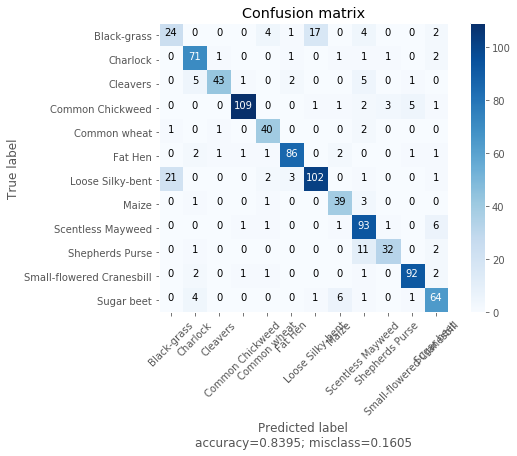

In [39]:
#Confusion matrix
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.rcParams["axes.grid"] = False
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

    
    

plot_confusion_matrix(confusion_matrix(validation_generator_new.classes, y_pred), normalize=False, target_names = class_names)


In [40]:
# print(validation_generator.classes)
# print(y_pred)

scores=model.evaluate_generator(validation_generator_new,validation_generator_new.samples)
print(scores[1])

0.853220696937698


In [0]:
print(model.metrics_names) #name of evaluated metrics
print(scores) # value of metrics evaluated

['loss', 'acc']
[0.5111189665410397, 0.8373812038014784]


# Gradient-weighted Class Activation Mapping.

Below method is based on this paper (https://arxiv.org/abs/1610.02391) .This technique allows to highlight the most important parts of the image taken into account for making the prediction. More details about the code in http://mxnet.incubator.apache.org/versions/master/tutorials/vision/cnn_visualization.html

In [0]:
#Grad Cam function

from keras.preprocessing import image
from keras.layers.core import Lambda
from keras.models import Sequential
from tensorflow.python.framework import ops
import keras.backend as K
import tensorflow as tf
import numpy as np
import keras
import sys
import cv2

def target_category_loss(x, category_index, nb_classes):
    return tf.multiply(x, K.one_hot([category_index], nb_classes)) #Actual matrix product. Besides, one_hot transforms categorical variable to binary vector

def target_category_loss_output_shape(input_shape):
    return input_shape

def normalize(x):
    # utility function to normalize a tensor by its L2 norm
    return x / (K.sqrt(K.mean(K.square(x))) + 1e-5)

def load_image(path):
#     img_path = sys.argv[1]
    img = image.load_img(path, target_size=(64, 64))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = keras.applications.vgg16.preprocess_input(x)
    return x

def register_gradient():
    if "GuidedBackProp" not in ops._gradient_registry._registry:
        @ops.RegisterGradient("GuidedBackProp")
        def _GuidedBackProp(op, grad):
            dtype = op.inputs[0].dtype
            return grad * tf.cast(grad > 0., dtype) * \
                tf.cast(op.inputs[0] > 0., dtype)

def compile_saliency_function(model, activation_layer='conv2d_27'):
    input_img = model.layers[0].input
    layer_dict = dict([(layer.name, layer) for layer in model.layers[1:]])
    layer_output = layer_dict[activation_layer].output
    max_output = K.max(layer_output, axis=3)
    saliency = K.gradients(K.sum(max_output), input_img)[0]
    return K.function([input_img, K.learning_phase()], [saliency])

def modify_backprop(model, name):
    g = tf.get_default_graph()
    with g.gradient_override_map({'Relu': name}):

        # get layers that have an activation
        layer_dict = [layer for layer in model.layers[1:]
                      if hasattr(layer, 'activation')]

        # replace relu activation
        for layer in layer_dict:
            if layer.activation == keras.activations.relu:
                layer.activation = tf.nn.relu

        # re-instanciate a new model
        new_model = model
    return new_model

def deprocess_image(x):
    '''
    Same normalization as in:
    https://github.com/fchollet/keras/blob/master/examples/conv_filter_visualization.py
    '''
    if np.ndim(x) > 3:
        x = np.squeeze(x)
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    if K.image_dim_ordering() == 'th':
        x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

# def grad_cam(input_model, image, category_index, layer_name):
    
#     model = Sequential()
#     model.add(input_model)

#     nb_classes = 12
#     target_layer = lambda x: target_category_loss(x, category_index, nb_classes)
#     model.add(Lambda(target_layer,
#                      output_shape = target_category_loss_output_shape))

#     loss = K.sum(model.layers[-1].output)
#     conv_output =  [l for l in model.layers[0].layers if l.name is layer_name][0].output
#     grads = normalize(K.gradients(loss, conv_output)[0])
#     gradient_function = K.function([model.layers[0].input], [conv_output, grads])

#     output, grads_val = gradient_function([image])
#     output, grads_val = output[0, :], grads_val[0, :, :, :]

#     weights = np.mean(grads_val, axis = (0, 1))
#     cam = np.ones(output.shape[0 : 2], dtype = np.float32)

#     for i, w in enumerate(weights):
#         cam += w * output[:, :, i]

#     cam = cv2.resize(cam, (64, 64))
#     cam = np.maximum(cam, 0)
#     heatmap = cam / np.max(cam)

#     #Return to BGR [0..255] from the preprocessed image
#     image = image[0, :]
#     image -= np.min(image)
#     image = np.minimum(image, 255)

#     cam = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)
#     cam = np.float32(cam) + np.float32(image)
#     cam = 255 * cam / np.max(cam)
#     return np.uint8(cam), heatmap


In [94]:
preprocessed_input = load_image('train/Shepherds Purse/b54f52362.png')
predictions = model.predict(preprocessed_input)
predicted_class = np.argmax(predictions)
print(predicted_class)



7


In [95]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
layer_dict

{'conv2d_19': <keras.layers.convolutional.Conv2D at 0x7f6c1df33908>,
 'conv2d_20': <keras.layers.convolutional.Conv2D at 0x7f6c1df338d0>,
 'conv2d_21': <keras.layers.convolutional.Conv2D at 0x7f6c1df33b38>,
 'conv2d_22': <keras.layers.convolutional.Conv2D at 0x7f6c3825e6d8>,
 'conv2d_23': <keras.layers.convolutional.Conv2D at 0x7f6c3825e9b0>,
 'conv2d_24': <keras.layers.convolutional.Conv2D at 0x7f6c38285780>,
 'conv2d_25': <keras.layers.convolutional.Conv2D at 0x7f6c381e7400>,
 'conv2d_26': <keras.layers.convolutional.Conv2D at 0x7f6c381cfc88>,
 'conv2d_27': <keras.layers.convolutional.Conv2D at 0x7f6c381904a8>,
 'dense_5': <keras.layers.core.Dense at 0x7f6c3815d908>,
 'dense_6': <keras.layers.core.Dense at 0x7f6c380df390>,
 'dropout_10': <keras.layers.core.Dropout at 0x7f6c381cfcf8>,
 'dropout_11': <keras.layers.core.Dropout at 0x7f6c3815dc18>,
 'dropout_12': <keras.layers.core.Dropout at 0x7f6c38110f28>,
 'dropout_9': <keras.layers.core.Dropout at 0x7f6c3825e5c0>,
 'flatten_3': <ker

In [112]:
#Grad-cam implementation

predicted_class = np.argmax(predictions)
category_index  = predicted_class
nb_classes = 12
layer_name="conv2d_27"
image = preprocessed_input

layer_output = model.layers[12].output


loss = K.sum(layer_output)


conv_output =  [model.get_layer(index=l).output for l in range(len(model.layers)) if model.get_layer(index=l).name == layer_name][0]

grads = normalize(K.gradients(loss, conv_output)[0])
gradient_function = K.function([model.layers[0].input], [conv_output, grads])


output, grads_val = gradient_function([image])
output, grads_val = output[0, :], grads_val[0, :, :, :]

weights = np.mean(grads_val, axis = (0, 1))
cam = np.ones(output.shape[0 : 2], dtype = np.float32)


for i, w in enumerate(weights):
    cam += w * output[:, :, i]

cam = cv2.resize(cam, (64, 64))
cam = np.maximum(cam, 0)
heatmap = cam / np.max(cam)

#Return to BGR [0..255] from the preprocessed image
image = image[0, :]
image -= np.min(image)
image = np.minimum(image, 255)

cam = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)
cam = np.float32(cam) + np.float32(image)
cam = 255 * cam / np.max(cam)
# #return np.uint8(cam), heatmap




cv2.imwrite("gradcam.jpg", cam)

register_gradient()
guided_model = modify_backprop(model, 'GuidedBackProp')
saliency_fn = compile_saliency_function(guided_model)
saliency = saliency_fn([preprocessed_input, 0])
gradcam = saliency[0] * heatmap[..., np.newaxis]
cv2.imwrite("guided_gradcam.jpg", deprocess_image(gradcam))




True

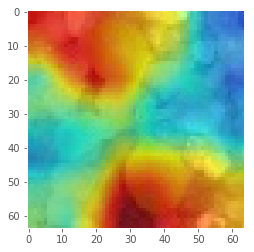

In [113]:
img=mpimg.imread('gradcam.jpg')
imgplot = plt.imshow(img)
plt.show()

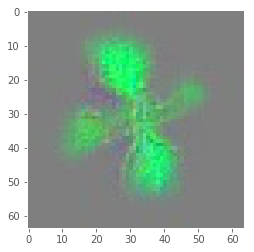

In [114]:
img=mpimg.imread('guided_gradcam.jpg')
imgplot = plt.imshow(img)
plt.show()